# Image classification 

Image classification is a computer vision task that involves categorizing images into predefined classes or categories. The goal is to develop algorithms or models that can accurately identify and assign labels to images based on their visual features and content. This task is commonly used in various applications, such as object recognition, facial recognition, medical imaging, and autonomous driving, to enable machines to understand and interpret visual information in a similar way to humans. The output of an image classification task is a prediction or probability distribution indicating the likelihood of each class for a given image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time, copy

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data.dataset import random_split


## Load dataset and transform

The "Modified National Institute of Standards and Technology" (__MNIST__) dataset consists of a large collection of 60,000 handwritten digits for training and an additional 10,000 handwritten digits for testing.
It dataset has served as a benchmark for evaluating and comparing the performance of various machine learning algorithms, particularly in the field of image classification. It has played a crucial role in the development and advancement of deep learning models, especially convolutional neural networks (CNNs), and has been used extensively for educational purposes and as a baseline for assessing new algorithms and techniques in the field.


_Image Format_: Each image in the MNIST dataset is a grayscale image with a resolution of 28x28 pixels. This results in a total of 784 pixels per image.

_Digit Classes_: The dataset covers ten classes representing the digits from 0 to 9. Each image is labeled with the corresponding digit class, providing the ground truth for training and evaluation.

_Data Distribution_: The dataset is balanced, meaning that it contains an equal number of samples for each digit class. This balance ensures that the model is exposed to an equal representation of each digit during training.


-------------------

__FashionMNIST__ is intended to be a more challenging dataset compared to MNIST, as it requires models to recognize and classify images of various clothing items accurately. FashionMNIST has the same Image Format, Data Distribution, and size of train- and test-set as of MNIST.

_Clothing Categories_: The dataset covers ten different clothing categories, including T-shirts/tops, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots. Each image is labeled with the corresponding clothing category, providing the ground truth for training and evaluation.

In [9]:
# Load the dataset and transform it into tensors and normalized between -1 and 1.


transform = transforms.Compose([       
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)) 
])


def load_dataset(name):
    print(name,'\n')
    if name == "FashionMNIST":
        train_dataset = datasets.FashionMNIST(root="FashionMNIST", train=True, download=True, transform=transform)
        test_dataset = datasets.FashionMNIST(root="FashionMNIST", train=False, download=True, transform=transform)
    elif name == "MNIST":
        train_dataset = datasets.MNIST(root="MNIST", train=True, download=True, transform=transform)
        test_dataset = datasets.MNIST(root="MNIST", train=False, download=True, transform=transform)
    return train_dataset, test_dataset 


# Choose either "MNIST" or "FashionMNIST" 
train_dataset, test_dataset = load_dataset("MNIST")


#train_dataset, val_dataset = random_split(train_dataset, [len(dataset) - 5000, 5000])

print(f'number of (train, test) examples = {len(train_dataset), len(test_dataset)}')


MNIST 

number of (train, test) examples = (60000, 10000)


### view a training example:

x of torch.Size([1, 28, 28]) :


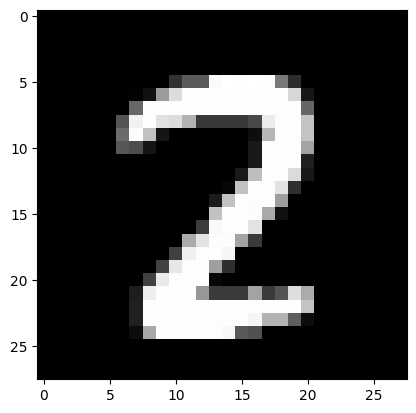

true label = y = 2

(x_min, x_max) =  (-1.0, 1.0)


In [10]:
idx = np.random.choice(len(train_dataset))

x = train_dataset[idx][0]
print(f'x of {x.shape} :')
plt.imshow(x[0], cmap='gray')
plt.show()

print(f'true label = y = {train_dataset[idx][1]}\n')

print(f'(x_min, x_max) =  {x.min().item(), round(x.max().item(),3)}')

# Define model (CNN), training and test loops

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"     # Get gpu or cpu device for training
print(f"Using {device} device\n")

Using cpu device



# [LeNet-5][1]

[1]:http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf

$ $

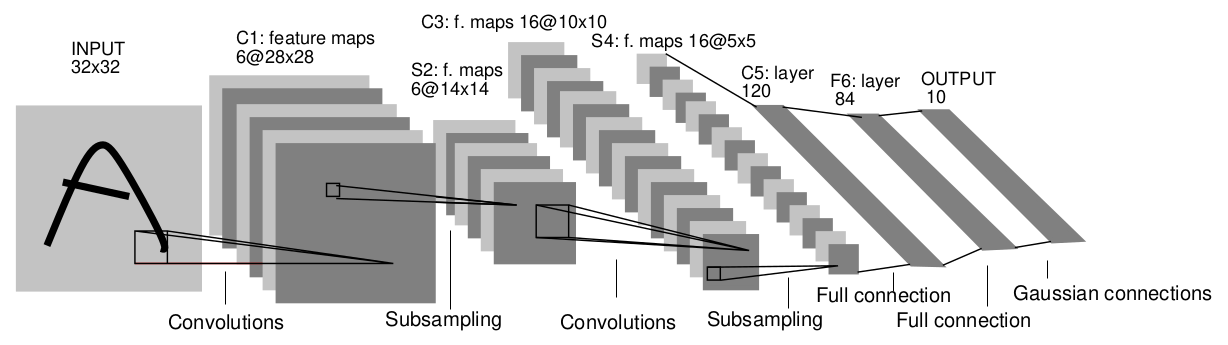



$ $

LeNet-5 is a convolutional neural network (CNN) architecture developed by Yann LeCun and his colleagues in the early 1990s. It was designed for handwritten digit recognition tasks and played a crucial role in the development of deep learning. Here is an overview of the LeNet-5 architecture:

__Input Layer__: LeNet-5 takes grayscale images of size 32x32 = 1x32x32 (in our case, it is 1x28x28) pixels as input.


__Convolutional Layer 1__: The first convolutional layer consists of 6 feature maps with a 5x5 kernel size and a stride of 1.

__Pooling Layer 1__: Following each convolutional layer, a pooling (subsampling) layer is applied to reduce the spatial dimensions. The first subsampling layer performs 2x2 max pooling with a stride of 2.


__Convolutional Layer 2__: The second convolutional layer consists of 16 feature maps with a 5x5 kernel size and a stride of 1.

__Pooling Layer 2__: The second subsampling layer performs 2x2 max pooling with a stride of 2. 

    
-----------------    
In the original case: the size decreases as 32 $\rightarrow$ 32-4=28 $\rightarrow$ 28/2=14 $\rightarrow$ 14-4=10 $\rightarrow$ 10/2=5 $\rightarrow$

In our case: the size decreases as 28 $\rightarrow$ 28-4=24 $\rightarrow$ 24/2=12 $\rightarrow$ 12-4=8  $\rightarrow$  8/2=4 $\rightarrow$

$\text{size_out} = \lfloor\frac{\text{size_in} \ +\ 2\; \text{padding}\ -\ \text{kernel_size}}{\text{stride}}\rfloor +1$. Here, $\text{padding}=0$.
    

----------------------------

__Fully Connected Layer 1__: After the convolutional and subsampling layers, the output is flattened and fed into a fully connected layer with 120 neurons.

__Fully Connected Layer 2__: The second fully connected layer has 84 neurons.


__Output Layer__: The final output layer consists of 10 neurons, corresponding to the 10 possible digit classes (0 to 9).
    
Activation Functions: LeNet-5 uses a sigmoid activation function for the fully connected layers and a tanh activation function for the convolutional layers.

Training: The LeNet-5 architecture is trained using the backpropagation algorithm with gradient descent optimization.
    
LeNet-5 was an influential model and helped establish the effectiveness of CNNs in various computer vision tasks. While it may seem relatively simple compared to modern CNN architectures, it laid the foundation for more complex and powerful networks that have been developed in the field of deep learning.
    

    
__Choose one of the following two CNNs.__

In [12]:
'''This CNN is LeNet-5'''

class CNN(nn.Module):                                                 # Define model
    def __init__(self):
        super().__init__()
        
        self.layers_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),  # stride's default value is 1
            nn.Tanh(),                                                # shape = [batch_size, 6, 24, 24]
            nn.MaxPool2d(kernel_size=2), # stride's default value is kernel_size, shape = [batch_size, 6, 12, 12]
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5), # shape = [batch_size, 16, 8, 8]
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2),                              # shape = [batch_size, 16, 4, 4]
            nn.Flatten(),
            nn.Linear(16*4*4, 120),                                   # shape = [batch_size, 120]
            nn.Sigmoid(),
            nn.Linear(120, 84),
            nn.Sigmoid(),
            nn.Linear(84, 10),
            nn.Softmax(dim=1)
        )
        
    def forward(self, x):
        x = self.layers_stack(x)
        return x

In [5]:
'''This is a simple CNN with 1 convolution, 1 pooling and 1 fully connected layer'''

class CNN(nn.Module):                                                 # Define model
    def __init__(self):
        super().__init__()
        
        self.layers_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3), # shape = [batch_size, 32, 26, 26]
            nn.LeakyReLU(negative_slope=0.0),
            #nn.Dropout(p=0.5),
            nn.MaxPool2d(kernel_size=2),                              # shape = [batch_size, 32, 13, 13]
            nn.Flatten(),
            nn.Linear(32*13*13, 10)
        )
       
    def forward(self, x):
        x = self.layers_stack(x)
        return x

In [13]:
def performance_estimate(dataset, model, loss_fn, train_or_test):
    '''this function computes accuracy and loss of a model on the training or test set'''
    data_size = len(dataset)
    
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
    num_batches = len(dataloader)
    
    model.eval()
    loss, accuracy = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            accuracy += (pred.argmax(1) == y).sum().item()
            loss += loss_fn(pred, y).item()
    accuracy /= data_size                                            # accuracy lies in the interval [0, 1]  
    loss /= num_batches
    print(f"{train_or_test} accuracy: {round(accuracy, 3)},  {train_or_test} loss: {round(loss,3)}")
    return accuracy, loss




def one_epoch(model, loss_fn, optimizer, dataset, batch_size):
    
    A_train, L_train, A_test, L_test = [], [], [], []

    dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
    
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        out = model(X)                             # Perform a single forward pass 
        loss = loss_fn(out, y)          
    
        optimizer.zero_grad()                      # Clear gradients
        loss.backward()                            # Derive gradients, backpropagation
        optimizer.step()                           # Update parameters based on gradients
        
    
        if batch % batch_size == 0: 
            #As training progress, computing and appending loss and accuracy of the model on train and test set
            accuracy_train, loss_train = performance_estimate(train_dataset, model, loss_fn, 'train')
            accuracy_test, loss_test = performance_estimate(test_dataset, model, loss_fn, 'test ')
            print()
            
            A_train.append(accuracy_train)        # 
            L_train.append(loss_train)
            A_test.append(accuracy_test)
            L_test.append(loss_test)
            
            #print(f"train loss: {round(loss,3)}")
    
    return A_train, L_train, A_test, L_test 
            

    
def training(dataset, batch_size, lr_, weight_decay_, epochs):
    
    model = CNN().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_, weight_decay=weight_decay_)
    
    A_Train, L_Train, A_Test, L_Test = [], [], [], []
    for t in range(epochs): 
        print(f"Epoch {t+1} ---------------------------------- \n")
        #As training progress, computing and appending loss and accuracy of the model on train and test set
        A_train, L_train, A_test, L_test = one_epoch(model, loss_fn, optimizer, dataset, batch_size)
        A_Train += A_train
        L_Train += L_train 
        A_Test += A_test
        L_Test += L_test
        
        #accuracy, loss = performance_estimate(test_dataset, model, loss_fn, 'test ')
    
    model_state_dict = model.state_dict()           # for saving or loading the trained model
    
    return A_Train, L_Train, A_Test, L_Test, model_state_dict
    

# training...

In [14]:
%%time


batch_size = 64
print(f'batch_size = {batch_size}\n')

#----------------------------------------------------------------------------------


A_Train, L_Train, A_Test, L_Test, model_state_dict = training(train_dataset, batch_size=batch_size, 
                                                              lr_=1e-3, weight_decay_=1e-8, epochs=1)


print(f' ~~~~~ training is done ~~~~~\n')

batch_size = 64

Epoch 1 ---------------------------------- 

train accuracy: 0.09,  train loss: 2.304
test  accuracy: 0.089,  test  loss: 2.304

train accuracy: 0.302,  train loss: 2.221
test  accuracy: 0.308,  test  loss: 2.219

train accuracy: 0.546,  train loss: 1.978
test  accuracy: 0.553,  test  loss: 1.973

train accuracy: 0.669,  train loss: 1.83
test  accuracy: 0.67,  test  loss: 1.828

train accuracy: 0.678,  train loss: 1.796
test  accuracy: 0.679,  test  loss: 1.795

train accuracy: 0.733,  train loss: 1.762
test  accuracy: 0.733,  test  loss: 1.761

train accuracy: 0.755,  train loss: 1.725
test  accuracy: 0.756,  test  loss: 1.724

train accuracy: 0.763,  train loss: 1.708
test  accuracy: 0.763,  test  loss: 1.707

train accuracy: 0.845,  train loss: 1.653
test  accuracy: 0.847,  test  loss: 1.651

train accuracy: 0.848,  train loss: 1.632
test  accuracy: 0.849,  test  loss: 1.63

train accuracy: 0.857,  train loss: 1.617
test  accuracy: 0.859,  test  loss: 1.615

train a

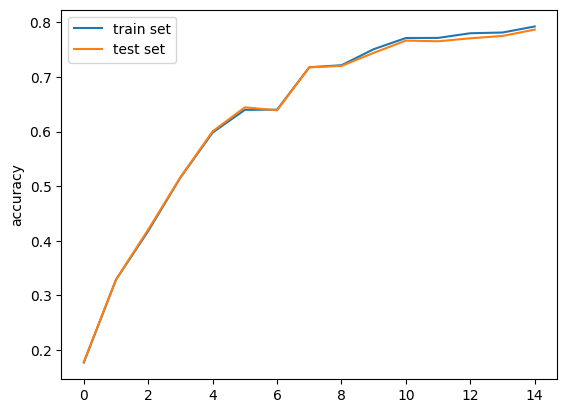

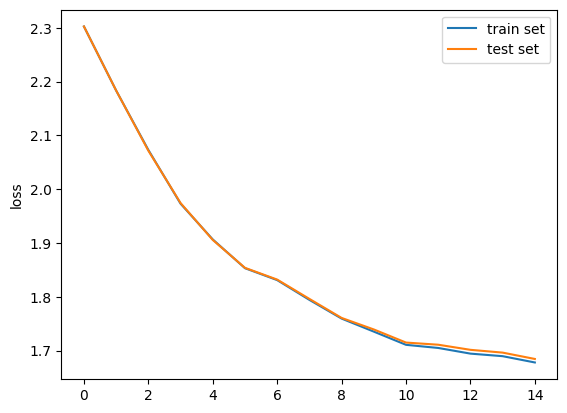

In [8]:
plt.plot(A_Train, label='train set')
plt.plot(A_Test, label='test set')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(L_Train, label='train set')
plt.plot(L_Test, label='test set')
plt.ylabel('loss')
plt.legend()
plt.show()

## save model

In [9]:
torch.save(model_state_dict, "model_MNIST_CNN.pth")

## load model

In [10]:
model = CNN().to(device)
model.load_state_dict(model_state_dict)

#model.load_state_dict(torch.load("model_MNIST_CNN.pth"))

<All keys matched successfully>

## predict test examples

x of torch.Size([1, 28, 28]) :


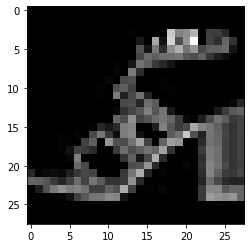

true label = y = 5

predicted label = 5



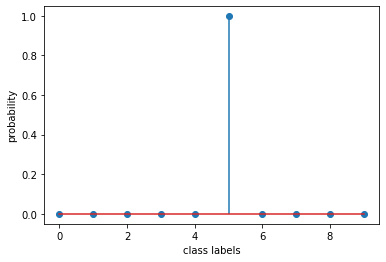

In [11]:
idx = np.random.choice(len(test_dataset))

x = test_dataset[idx][0]
print(f'x of {x.shape} :')
plt.imshow(x[0], cmap='gray')
plt.show()

print(f'true label = y = {test_dataset[idx][1]}\n')


out_ = model(x.view(1, 1, 28, 28)).detach().flatten()
prob = F.softmax(out_, dim=0)
pred = prob.argmax().item()
print(f'predicted label = {pred}\n')

plt.stem(np.arange(10), prob)
plt.ylabel('probability')
plt.xlabel('class labels')
plt.show()

$ $

$ $

## simplified training loop

In [12]:
def one_epoch_(model, loss_fn, optimizer, dataset, batch_size):
    
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
    
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        out = model(X)                             # Perform a single forward pass
        loss = loss_fn(out, y)          
    
        optimizer.zero_grad()                      # Clear gradients
        loss.backward()                            # Derive gradients, backpropagation
        optimizer.step()                           # Update parameters based on gradients
    
        if batch % batch_size == 0: 
            print(f"train loss: {round(loss.item(),3)}")


    
    
def training_(dataset, batch_size, lr_, weight_decay_, epochs):
    
    model = CNN().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_, weight_decay=weight_decay_)
    
    for t in range(epochs): 
        print(f"Epoch {t+1} ---------------------------------- \n ")
        one_epoch_(model, loss_fn, optimizer, dataset, batch_size)
        
        #accuracy_train, loss_train = performance_estimate(train_dataset, model, loss_fn, 'train')
        #accuracy_test, loss_test = performance_estimate(test_dataset, model, loss_fn, 'test ')
        #print()

    
    model_state_dict = model.state_dict()
    return model_state_dict

    

In [1]:
%%time


batch_size = 64
print(f'batch_size = {batch_size}\n')

#----------------------------------------------------------------------------------

model_state_dict = training_(train_dataset, batch_size=batch_size, lr_=1e-3, weight_decay_=1e-8, epochs=5)

print()
print(f' ~~~~~ training is done ~~~~~\n')

batch_size = 64



NameError: name 'training_' is not defined

In [14]:
%%time


model = CNN().to(device)
model.load_state_dict(model_state_dict)
loss_fn = nn.CrossEntropyLoss()


accuracy_train, loss_train = performance_estimate(train_dataset, model, loss_fn, 'train')
accuracy_test, loss_test = performance_estimate(test_dataset, model, loss_fn, 'test ')
print()



train accuracy: 0.931,  train loss: 0.199
test  accuracy: 0.9,  test  loss: 0.277

CPU times: user 1min 8s, sys: 16 ms, total: 1min 8s
Wall time: 17.2 s


# 